# Library Yang Digunakan

In [ ]:
# Import library
import numpy as np #untuk matriks, array berdimensi, operasi matematika
import matplotlib.pyplot as plt #membuat grafik, plot, visualisasi data
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix

# Mengunggah Data

In [ ]:
# Load data
mnist = tf.keras.datasets.mnist

# Load the training and test split of the MNIST dataset
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_shape = training_images.shape
test_shape = test_images.shape

print(f"Terdapat {train_shape[0]} contoh dengan bentuk ({train_shape[1]}, {train_shape[2]}) pada data gambar latih")
print(f"Terdapat {test_shape[0]} contoh dengan bentuk ({test_shape[1]}, {test_shape[2]}) pada data gambar uji")

Terdapat 60000 contoh dengan bentuk (28, 28) pada data gambar latih
Terdapat 10000 contoh dengan bentuk (28, 28) pada data gambar uji


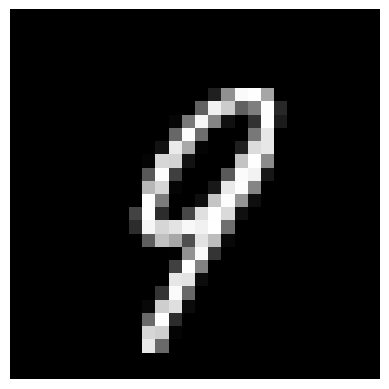

LABEL: 9


In [ ]:
plt.imshow(training_images[22], cmap='gray')
plt.axis('off')
plt.show()
print(f'LABEL: {training_labels[22]}')

In [ ]:
# Set number of characters per row when printing
np.set_printoptions(linewidth=320)
print(f'Bentuk dari sisi data: \n {training_images[22]}')

Bentuk dari sisi data: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31 144 250 254 166   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  98 241 204  97 126 253  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6 1

# Data Processing

In [ ]:
# Reshape
training_images = training_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalisasi nilai piksel
training_images = training_images / 255
test_images = test_images / 255

# One-hot encoding
training_labels = to_categorical(training_labels)
test_labels = to_categorical(test_labels)

In [ ]:
print(f'Data yang diubah jadi 2 dimensi \n{training_images[22]}')

Data yang diubah jadi 2 dimensi 
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [

# Membuat Callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nAkurasi tinggi, batalkan training!")
      self.model.stop_training = True

callbacks = myCallback()

# Membangun Model

In [ ]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Dengan Callback

In [ ]:
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, epochs=10, batch_size=200, callbacks=[callbacks], validation_data=(test_images, test_labels))

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 0.2999 - accuracy: 0.9168 - val_loss: 0.1556 - val_accuracy: 0.9549
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1253 - accuracy: 0.9647 - val_loss: 0.1085 - val_accuracy: 0.9677
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0830 - accuracy: 0.9761 - val_loss: 0.0830 - val_accuracy: 0.9743
Epoch 4/10
293/300 [============================>.] - ETA: 0s - loss: 0.0594 - accuracy: 0.9831
Akurasi tinggi, batalkan training!
300/300 [==============================] - 1s 4ms/step - loss: 0.0593 - accuracy: 0.9830 - val_loss: 0.0728 - val_accuracy: 0.9770


## Tanpa Callback

In [ ]:
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, epochs=10, batch_size=200, validation_data=(test_images, test_labels))

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 0.3048 - accuracy: 0.9127 - val_loss: 0.1713 - val_accuracy: 0.9516
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1238 - accuracy: 0.9644 - val_loss: 0.1072 - val_accuracy: 0.9686
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0819 - accuracy: 0.9765 - val_loss: 0.0909 - val_accuracy: 0.9714
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0599 - accuracy: 0.9826 - val_loss: 0.0729 - val_accuracy: 0.9776
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0452 - accuracy: 0.9873 - val_loss: 0.0703 - val_accuracy: 0.9794
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0349 - accuracy: 0.9903 - val_loss: 0.0664 - val_accuracy: 0.9792
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0262 - accuracy: 0.9930 - val_loss: 0.0614 - val_accuracy: 0.9813
Epoch 

# Plot Hasil Train

## Grafik Dengan Callback

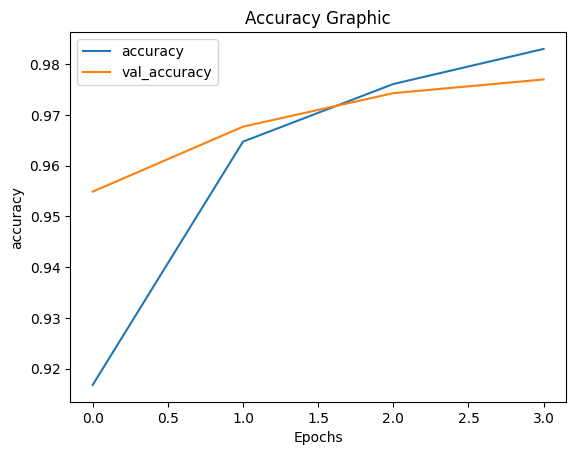

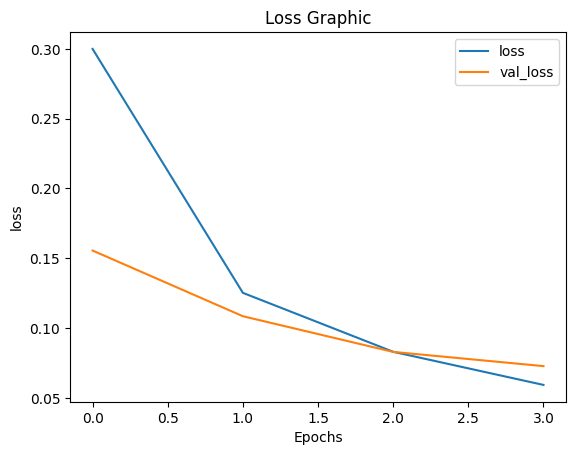

In [ ]:
def plot_graphs(history, string, title):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title(title)
  plt.show()

plot_graphs(history, "accuracy", "Accuracy Graphic")
plot_graphs(history, "loss", "Loss Graphic")

## Grafik Tanpa Callback

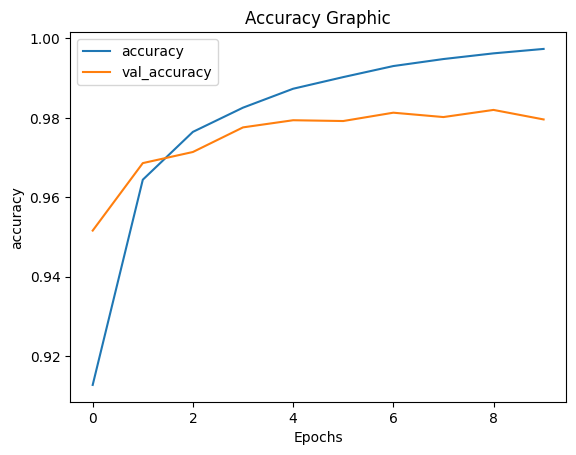

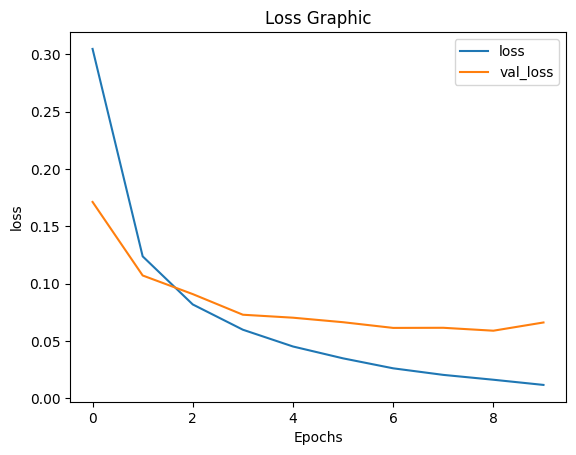

In [ ]:
def plot_graphs(history, string, title):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title(title)
  plt.show()

plot_graphs(history, "accuracy", "Accuracy Graphic")
plot_graphs(history, "loss", "Loss Graphic")

# Confusion Matrix

313/313 [==============================] - 1s 1ms/step


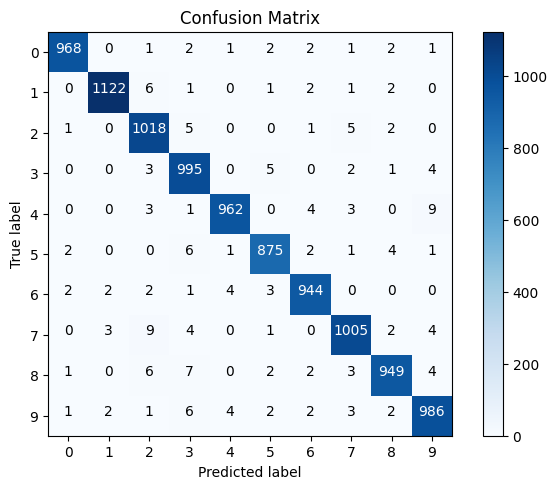

In [ ]:
# Membuat prediksi
classifications = model.predict(test_images)
predicted_labels = np.argmax(classifications, axis=1)

# Mengubah label ke format numerik
true_labels = np.argmax(test_labels, axis=1)

# Membuat daftar label
classes = list(range(10))

# Membuat confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Menampilkan confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=0)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Evaluasi

In [ ]:
# Mengevaluasi model pada data yang belum dilihat
eval = model.evaluate(test_images, test_labels)
print(f'Test loss: {eval[0]} \nTest accuracy: {eval[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9824
Test loss: 0.061592549085617065 
Test accuracy: 0.9824000000953674


# Prediksi

In [ ]:
classifications = model.predict(test_images)

print(f'Predicted values: {classifications[150]}')
print(f'True label: {test_labels[150]}')

313/313 [==============================] - 0s 2ms/step
Predicted values: [4.8628195e-11 2.4837207e-13 3.2367951e-09 4.1205858e-08 1.2097886e-08 1.4618508e-06 1.0658132e-09 3.2097356e-07 1.0527430e-06 9.9999714e-01]
True label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
predictednumber = np.argmax(classifications[150])
predictednumber

9

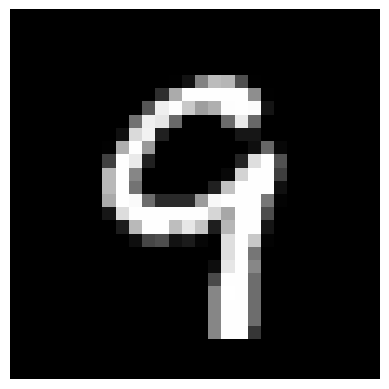

In [ ]:
plt.imshow(np.reshape(test_images[150], (28,28)), cmap='gray')
plt.axis('off')
plt.show()